## 1. 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import keras
from IPython.display import display
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## 2. 데이터 불러오기

In [101]:
banktest = pd.read_csv("dataset/credit_train_kor2.csv")

In [102]:
banktest.head()

,대출 ID,고객 ID,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [103]:
banktest.columns

Index(['대출 ID', '고객 ID', '대출 상태', '현재 대출 총액', '기간', '신용점수', '연소득', '현직업 근속연수',
       '거주지 소유 여부', '대출 목적', '월별 부채', '신용 연도', '마지막 연체 이후 개월 수', '보유 계좌 개수',
       '신용문제 발생 횟수', '현재 신용 잔고', '최대 신용 잔고', '파산 횟수', '재산차압권'],
      dtype='object')

### * 데이터 결측치 개수확인

In [121]:
banktest.isnull().sum()

대출 ID                 0
고객 ID                 0
대출 상태                 0
현재 대출 총액              0
기간                    0
신용점수              19154
연소득               19154
현직업 근속연수           4222
거주지 소유 여부             0
대출 목적                 0
월별 부채                 0
신용 연도                 0
마지막 연체 이후 개월 수    53141
보유 계좌 개수              0
신용문제 발생 횟수            0
현재 신용 잔고              0
최대 신용 잔고              2
파산 횟수               204
재산차압권                10
dtype: int64

### * 데이터 이상치 확인

#### matplotlib 설정

In [105]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

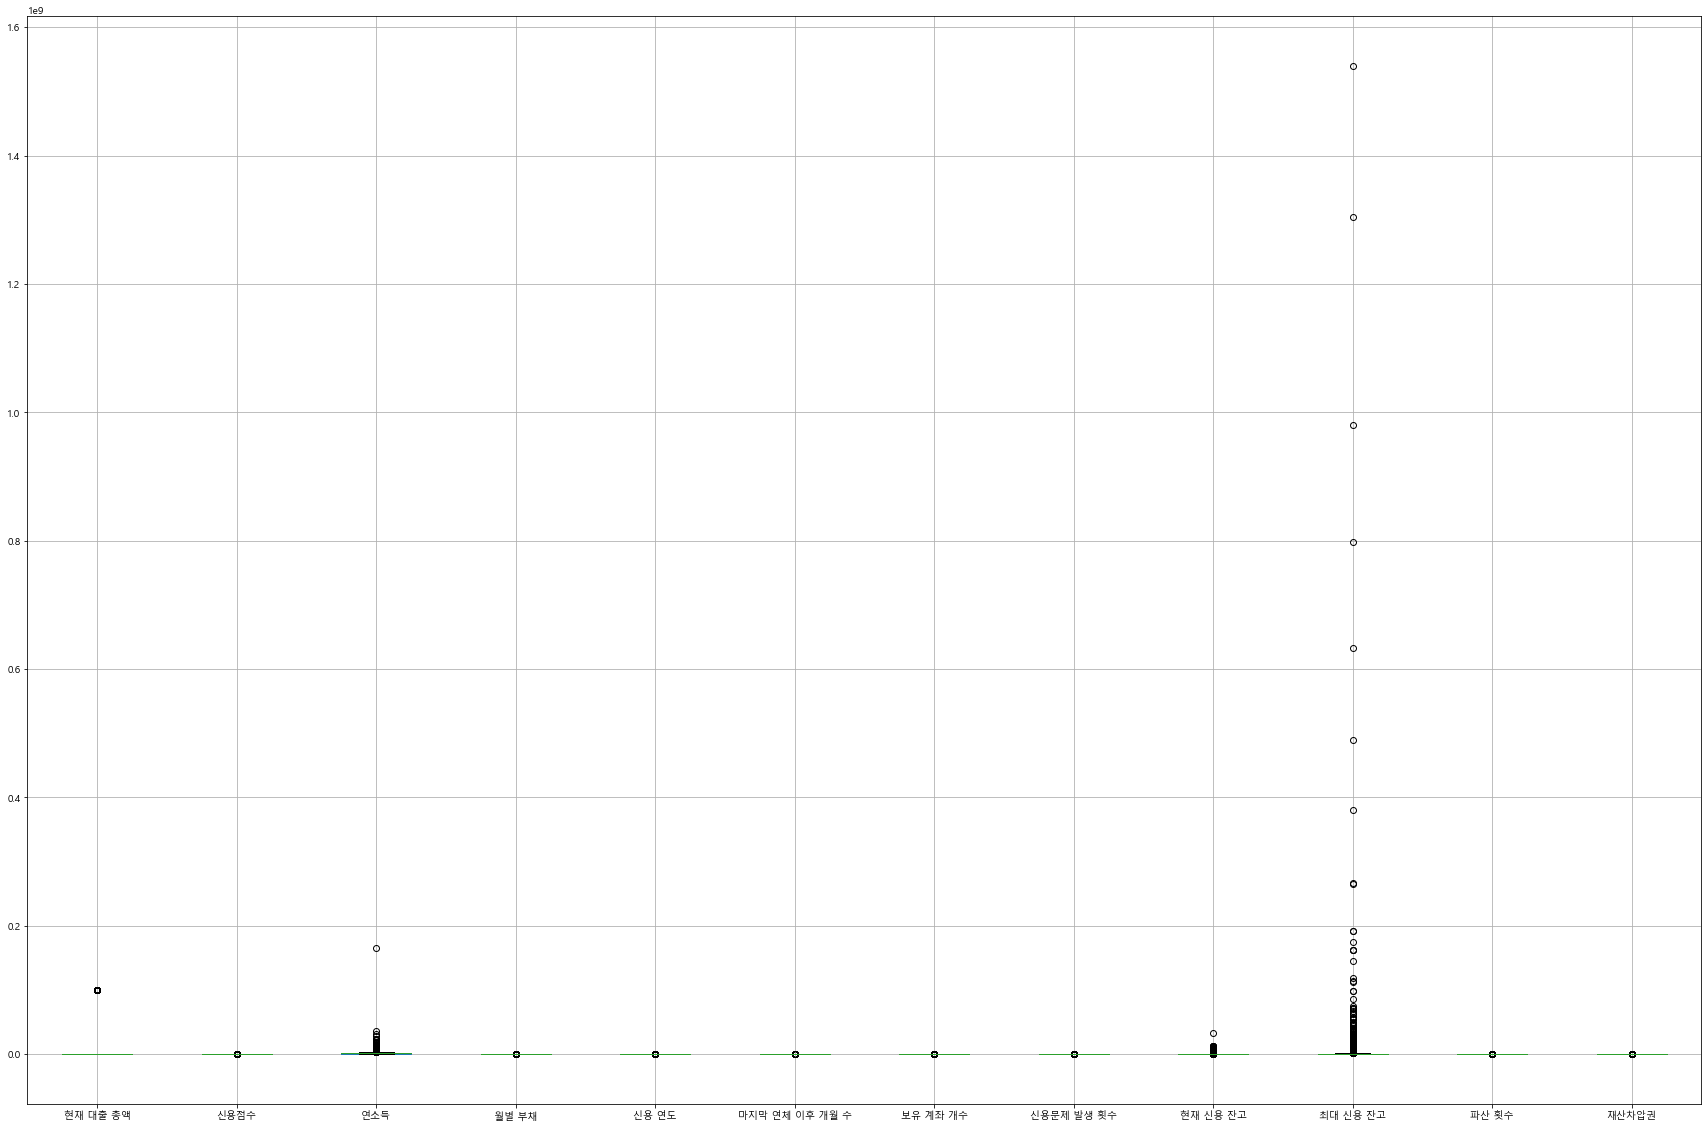

In [106]:
banktest.boxplot(figsize=(30,20))

## 3. 데이터 정제

### * 데이터 이상치 제거

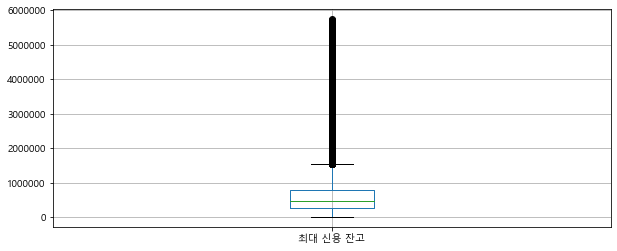

In [119]:
banktest.boxplot(column="최대 신용 잔고", figsize=(10,4))

In [108]:
banktest["최대 신용 잔고"].max()
# banktest["Maximum Open Credit"].min()

1539737892.0

In [109]:
banktest[banktest["최대 신용 잔고"]==1539737892.0]

,대출 ID,고객 ID,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
30604,f02dc06f-30f4-4b1d-ba58-156c2f3bd33d,a5c22bae-59c4-4a6c-8f04-628a4dadef57,Fully Paid,757218,Long Term,729.0,3269805.0,< 1 year,Home Mortgage,Debt Consolidation,38147.82,19.8,NaN,16,0,2659544,1.539738e+09,0.0,0.0


In [118]:
banktest["최대 신용 잔고"].mean()

614029.6871055522

In [117]:
banktest["최대 신용 잔고"][banktest["최대 신용 잔고"]>5737892.0]=760798.381747635

C:\ProgramData\Anaconda3\envs\juno\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
banktest["Maximum Open Credit"]

0         416746.0
1         850784.0
2         750090.0
3         386958.0
4         427174.0
            ...   
100509         NaN
100510         NaN
100511         NaN
100512         NaN
100513         NaN
Name: Maximum Open Credit, Length: 100514, dtype: float64

### 결측치 제거

In [99]:
# banktest["신용점수"].isnull() = banktest["신용점수"].mean()
banktest[["Credit Score"]] = banktest[["Credit Score"]].fillna(banktest[["Credit Score"]].mean())

In [100]:
banktest[["Annual Income"]] = banktest[["Annual Income"]].fillna(banktest[["Annual Income"]].mean())

In [11]:
banktest[["마지막 연체 이후 개월 수"]] = banktest[["마지막 연체 이후 개월 수"]].fillna(banktest[["마지막 연체 이후 개월 수"]].mean())

In [17]:
# 현직업 근속연수
banktest[["현직업 근속연수"]] = banktest[["현직업 근속연수"]].fillna(banktest[["현직업 근속연수"]].mean())

In [23]:
banktest.isnull().sum()

대출 ID                0
고객 ID                0
대출 상태                0
현재 대출 총액             0
기간                   0
신용점수                 0
연소득                  0
현직업 근속연수          4193
거주지 소유 여부            0
대출 목적                0
월별 부채                0
신용 연도                0
마지막 연체 이후 개월 수       0
보유 계좌 개수             0
신용문제 발생 횟수           0
현재 신용 잔고             0
최대 신용 잔고             2
파산 횟수              200
재산차압권                9
dtype: int64

### 정제 데이터 프레임 생성

In [123]:
bankpuri = banktest.dropna(axis=0)

In [124]:
del bankpuri["대출 ID"]
del bankpuri["고객 ID"]

In [125]:
bankpuri.isnull().sum()

대출 상태             0
현재 대출 총액          0
기간                0
신용점수              0
연소득               0
현직업 근속연수          0
거주지 소유 여부         0
대출 목적             0
월별 부채             0
신용 연도             0
마지막 연체 이후 개월 수    0
보유 계좌 개수          0
신용문제 발생 횟수        0
현재 신용 잔고          0
최대 신용 잔고          0
파산 횟수             0
재산차압권             0
dtype: int64

### 이산형 데이터 추출

In [126]:
df_num = bankpuri.select_dtypes(exclude = "object")
df_num.head()

,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
2,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
6,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
8,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
10,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
12,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


### 범주형 데이터 추출

In [127]:
df_char = bankpuri.select_dtypes(include = "object")
df_char.head()

,대출 상태,기간,현직업 근속연수,거주지 소유 여부,대출 목적
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
6,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation
8,Fully Paid,Short Term,2 years,Rent,Debt Consolidation
10,Fully Paid,Short Term,3 years,Rent,Debt Consolidation
12,Fully Paid,Short Term,< 1 year,Own Home,Debt Consolidation


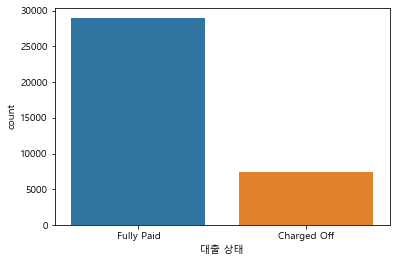

In [128]:
#df_char["대출 상태"]
sns.countplot(df_char["대출 상태"])

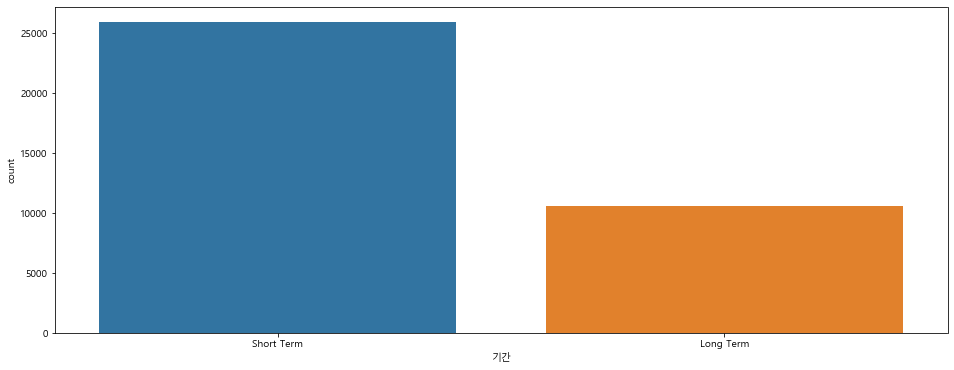

In [129]:
plt.figure(figsize=(16, 6))
sns.countplot(df_char["기간"])

In [136]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale
df_scale_num = scale(df_num)

## 4. 탐색적 분석

Text(0.5, 1.0, '고객의 대출목적')

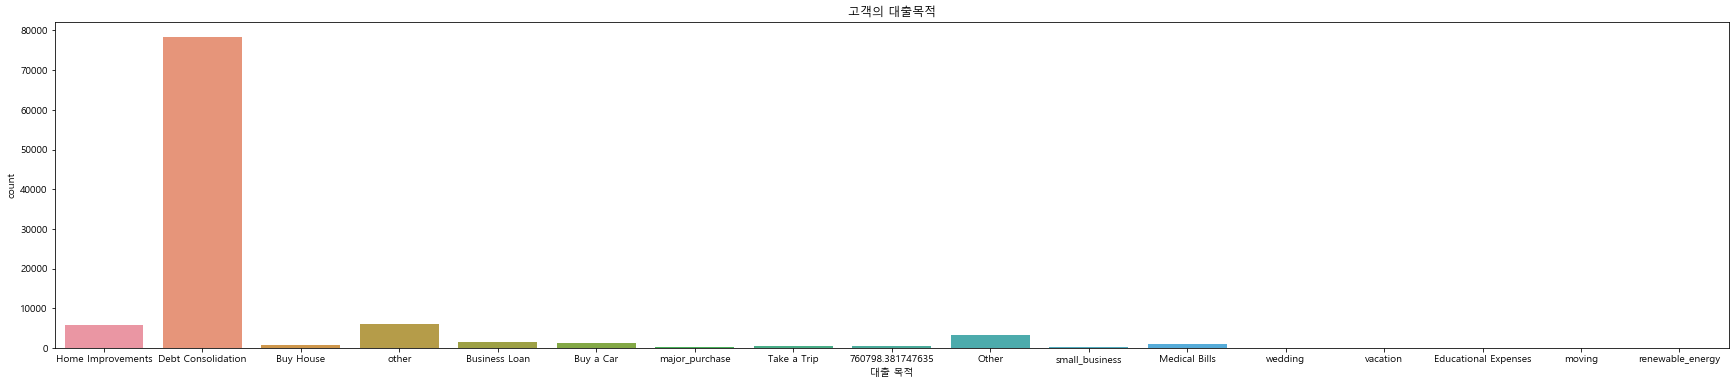

In [43]:
plt.figure(figsize=(30, 6))
sns.countplot(banktest['대출 목적'])
plt.title("고객의 대출목적")